In [30]:
import torch
import pandas as pd
import numpy as np
import torch.nn as nn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, log_loss
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv(r"C:\Training\Academy\Statistics (Python)\Cases\Image Segmentation\Image_Segmention.csv")
dum_df = pd.get_dummies(df)
dum_df.head()

,region.centroid.col,region.centroid.row,region.pixel.count,short.line.density.5,short.line.density.2,vedge.mean,vegde.sd,hedge.mean,hedge.sd,intensity.mean,...,value.mean,saturation.mean,hue-mean,Class_BRICKFACE,Class_CEMENT,Class_FOLIAGE,Class_GRASS,Class_PATH,Class_SKY,Class_WINDOW
0,188,133,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,...,8.444445,0.538580,-0.924817,True,False,False,False,False,False,False
1,105,139,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,...,7.555555,0.532628,-0.965946,True,False,False,False,False,False,False
2,34,137,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,...,7.777778,0.573633,-0.744272,True,False,False,False,False,False,False
3,39,111,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,...,7.888889,0.562919,-1.175773,True,False,False,False,False,False,False
4,16,128,9,0.0,0.0,0.500000,0.077778,0.666667,0.311111,5.555555,...,7.111111,0.561508,-0.985811,True,False,False,False,False,False,False


In [32]:
X = dum_df.iloc[:,:-7]
X.head()

,region.centroid.col,region.centroid.row,region.pixel.count,short.line.density.5,short.line.density.2,vedge.mean,vegde.sd,hedge.mean,hedge.sd,intensity.mean,rawred.mean,rawblue.mean,rawgreen.mean,exred.mean,exblue.mean,exgreen.mean,value.mean,saturation.mean,hue-mean
0,188,133,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
1,105,139,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
2,34,137,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
3,39,111,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773
4,16,128,9,0.0,0.0,0.500000,0.077778,0.666667,0.311111,5.555555,6.888889,6.666666,3.111111,4.000000,3.333333,-7.333334,7.111111,0.561508,-0.985811


In [33]:
y = dum_df.iloc[:,-7:]
y.head()

,Class_BRICKFACE,Class_CEMENT,Class_FOLIAGE,Class_GRASS,Class_PATH,Class_SKY,Class_WINDOW
0,True,False,False,False,False,False,False
1,True,False,False,False,False,False,False
2,True,False,False,False,False,False,False
3,True,False,False,False,False,False,False
4,True,False,False,False,False,False,False


In [34]:
y = y.values

In [35]:
le = LabelEncoder()
le_y = le.fit_transform(df['Class'])

In [36]:
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state=23,stratify=le_y)
X_scl_trn = scaler.fit_transform(X_train) 
X_scl_tst = scaler.transform(X_test) 


In [37]:
X_torch = torch.from_numpy(X_scl_trn)
y_torch = torch.from_numpy(y_train)
print(X_torch.size())
print(y_torch.size())

torch.Size([146, 19])
torch.Size([146, 7])


In [38]:
type(X_torch)

torch.Tensor

In [93]:
X_scl_trn.shape[1]

19

In [121]:
class MLPClassifier(torch.nn.Module):    
    def __init__(self, num_features):
        super().__init__()
        self.apply(self._init_weights) # Weight Initialization
        self.linear1 = nn.Linear(in_features=num_features, out_features=10)
        self.linear2 = nn.Linear(10, 5)
        self.linear3 = nn.Linear(5,7)
        self.relu = nn.ReLU()
        self.selu = nn.SELU()
        #self.bn = nn.BatchNorm1d(num_features)
        self.softmax = nn.Softmax(dim=1)
    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            module.weight.data.kaiming_uniform_()
            if module.bias is not None:
                module.bias.data.zero_()

    def forward(self, x):
        x = self.relu(self.linear1(x))
        x = self.selu(self.linear2(x))
        output = self.softmax(self.linear3(x))
        return output

In [122]:
torch.manual_seed(23)
model = MLPClassifier(num_features=X_scl_trn.shape[1])

In [123]:
print(model)

MLPClassifier(
  (linear1): Linear(in_features=19, out_features=10, bias=True)
  (linear2): Linear(in_features=10, out_features=5, bias=True)
  (linear3): Linear(in_features=5, out_features=7, bias=True)
  (relu): ReLU()
  (selu): SELU()
  (softmax): Softmax(dim=1)
)


In [124]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)

In [125]:
y_torch.size()

torch.Size([146, 7])

In [126]:
y_pred = model(X_torch.float())
print(y_torch.shape)
print(y_pred.shape)

torch.Size([146, 7])
torch.Size([146, 7])


In [127]:
y_pred[:5]

tensor([[0.0936, 0.1664, 0.1275, 0.1134, 0.2182, 0.1398, 0.1410],
        [0.0964, 0.1651, 0.1253, 0.1070, 0.2244, 0.1343, 0.1475],
        [0.0959, 0.1666, 0.1254, 0.1099, 0.2184, 0.1383, 0.1455],
        [0.0903, 0.1629, 0.1237, 0.1065, 0.2218, 0.1467, 0.1482],
        [0.0960, 0.1675, 0.1274, 0.1132, 0.2173, 0.1368, 0.1418]],
       grad_fn=<SliceBackward0>)

In [128]:
y_torch.float().size()

torch.Size([146, 7])

### Initial Log Loss

In [129]:
loss = criterion(y_pred, y_torch.float())
loss

tensor(1.9461, grad_fn=<DivBackward1>)

In [130]:
X_torch_test = torch.from_numpy(X_scl_tst)
type(X_torch_test)

torch.Tensor

In [131]:
y_torch_test = torch.from_numpy(y_test)
y_torch_test.size()

torch.Size([63, 7])

### Training Loop

In [132]:
train_losses = []
test_losses = []
for epoch in np.arange(0,1000):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred_prob = model(X_torch.float())
    y_pred_prob_test = model(X_torch_test.float())
     
    # Compute and print loss
    loss = criterion(y_pred_prob, y_torch.float())
    train_losses.append(loss.detach().numpy())
    tst_loss = criterion(y_pred_prob_test, y_torch_test.float() )
    test_losses.append(tst_loss.detach().numpy())
     
    if epoch%1000 == 0:
       print('epoch: ', epoch+1,' train loss: ', loss.item(), " test loss:", tst_loss.item())
    
    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    
    # perform a backward pass (backpropagation)
    loss.backward()
    
    # Update the parameters
    optimizer.step()
print('epoch: ', epoch+1,' train loss: ', loss.item(), " test loss:", tst_loss.item())

epoch:  1  train loss:  1.9460543394088745  test loss: 1.9463154077529907
epoch:  1000  train loss:  1.2052205801010132  test loss: 1.322849988937378


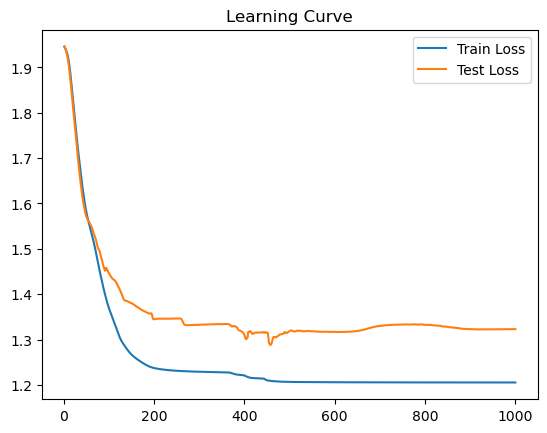

In [133]:
plt.plot(np.arange(1,1001), train_losses, label='Train Loss' )
plt.plot(np.arange(1,1001), test_losses, label='Test Loss' )
plt.title("Learning Curve")
plt.legend()
plt.show()

### Training Set Log Loss after training loop execution

In [134]:
loss

tensor(1.2052, grad_fn=<DivBackward1>)

In [135]:
pred_proba = model(X_torch_test.float()) 
pred_proba[:5]

tensor([[5.6031e-06, 9.3753e-15, 9.9999e-01, 1.3435e-08, 4.1486e-17, 5.4312e-31,
         2.4580e-11],
        [3.9034e-23, 4.2106e-13, 2.7060e-17, 1.4215e-26, 1.0000e+00, 1.1882e-22,
         6.8527e-40],
        [1.0000e+00, 2.3521e-11, 2.5948e-06, 1.5137e-13, 6.9737e-20, 1.8560e-28,
         3.6753e-07],
        [1.0878e-19, 2.6292e-06, 2.8461e-18, 3.6536e-23, 1.0000e+00, 5.0086e-14,
         1.1199e-28],
        [1.9338e-06, 1.2035e-10, 9.9813e-01, 7.4488e-05, 1.3000e-17, 9.3040e-26,
         1.7913e-03]], grad_fn=<SliceBackward0>)

In [136]:
pred_proba.size()

torch.Size([63, 7])

In [137]:
y_pred = np.argmax(pred_proba.detach().numpy(), axis=1 )
y_pred[:5]

array([2, 4, 0, 4, 2], dtype=int64)

In [138]:
y_test_lbl = np.argmax(y_test, axis=1)
y_test_lbl[:5]

array([2, 4, 0, 4, 6], dtype=int64)

### Test Set Accuracy Score

In [139]:
print(accuracy_score(y_test_lbl,y_pred))

0.8412698412698413
